# Pima Indians Diabetes Database

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.


Different parameters Descriptions

    BMI: 
    BMI is a person’s weight in kilograms divided by the square of height in meters. A high BMI can indicate high body fatness.
    
    Glucose:
    A blood sugar level less than 140 mg/dL (7.8 mmol/L) is considered normal.A blood sugar level from 140 to 199 mg/dL (7.8 to 11.0 mmol/L) is considered prediabetes. This is sometimes referred to as impaired glucose tolerance. A blood sugar level of 200 mg/dL (11.1 mmol/L) or higher indicates type 2 diabetes.
    
    Insulin:
    Insulin is a hormone (a chemical substance that acts as a messenger in the human body) that is secreted by an abdominal organ called the pancreas. It controls the breakdown of carbohydrates, fats and proteins in the body. It also guides the liver and muscles to store glucose and fat that can be used during periods of increased energy requirements and fasting. Insulin is a “key” that unlocks the cell gates so that glucose from the blood enters the cells. The cells of the muscle and fat tissue are dependent solely on insulin for glucose uptake and use.
    
    Pregnancies:
    Diabetes can cause problems during pregnancy for women and their developing babies. Poor control of diabetes during pregnancy increases the chances for birth defects and other problems for the pregnancy. It can also cause serious complications for the woman. Proper health care before and during pregnancy can help prevent birth defects and other health problems.
    
    Skin Thickness:
    Skin thickness is primarily determined by collagen content and is increased in insulin-dependent diabetes mellitus (IDDM). We measured skin thickness in 66 IDDM patients aged 24–38 yr and investigated whether it correlated with long-term glycemic control and the presence of certain diabetic complications.
    
    Age:
    Older adults are at high risk for the development of type 2 diabetes due to the combined effects of increasing insulin resistance and impaired pancreatic islet function with aging.
    
    Bloodpressure:
    Over time, diabetes damages the small blood vessels in your body, causing the walls of the blood vessels to stiffen. This increases pressure, which leads to high blood pressure.” The combination of high blood pressure and type 2 diabetes can greatly increase your risk of having a heart attack or stroke.
    
    Diabetes pedigree function:
    A function which scores likelihood of diabetes based on family history.

# Store the data in MongoDB database

  1. name of database   =   healthdb
  2. name of collection =   diabetes_data

In [1]:
# importing the libraries

import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#connecting to the database through 27017 port

client =pymongo.MongoClient('mongodb://127.0.0.1:27017/')

In [3]:
# using the database

db=client.healthdb

In [4]:
# use the collection

data=db.diabetes_data

In [178]:
# printing all the data stored in diabetes_data collection
for x in data.find({},{ "_id": 0, "Pregnancies": 1, "Glucose": 1 ,
                       "BloodPressure": 1, "SkinThickness": 1,
                       "Insulin": 1, "BMI": 1, "DiabetesPedigreeFunction": 1, "Age": 1,"Outcome":1}):
  print(x)

{'Pregnancies': 6, 'Glucose': 148, 'BloodPressure': 72, 'SkinThickness': 35, 'Insulin': 0, 'BMI': 33.6, 'DiabetesPedigreeFunction': 0.627, 'Age': 50, 'Outcome': 1}
{'Pregnancies': 1, 'Glucose': 85, 'BloodPressure': 66, 'SkinThickness': 29, 'Insulin': 0, 'BMI': 26.6, 'DiabetesPedigreeFunction': 0.351, 'Age': 31, 'Outcome': 0}
{'Pregnancies': 8, 'Glucose': 183, 'BloodPressure': 64, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 23.3, 'DiabetesPedigreeFunction': 0.672, 'Age': 32, 'Outcome': 1}
{'Pregnancies': 1, 'Glucose': 89, 'BloodPressure': 66, 'SkinThickness': 23, 'Insulin': 94, 'BMI': 28.1, 'DiabetesPedigreeFunction': 0.167, 'Age': 21, 'Outcome': 0}
{'Pregnancies': 0, 'Glucose': 137, 'BloodPressure': 40, 'SkinThickness': 35, 'Insulin': 168, 'BMI': 43.1, 'DiabetesPedigreeFunction': 2.288, 'Age': 33, 'Outcome': 1}
{'Pregnancies': 5, 'Glucose': 116, 'BloodPressure': 74, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 25.6, 'DiabetesPedigreeFunction': 0.201, 'Age': 30, 'Outcome': 0}
{'Pregnancies': 3

In [181]:
# printing records having age greater than 50 
for x in data.find({"Age":{"$gt": 50}}):
    print(x)

{'_id': ObjectId('6161af039af818f4bdffd783'), 'Pregnancies': 2, 'Glucose': 197, 'BloodPressure': 70, 'SkinThickness': 45, 'Insulin': 543, 'BMI': 30.5, 'DiabetesPedigreeFunction': 0.158, 'Age': 53, 'Outcome': 1}
{'_id': ObjectId('6161af039af818f4bdffd784'), 'Pregnancies': 8, 'Glucose': 125, 'BloodPressure': 96, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0, 'DiabetesPedigreeFunction': 0.232, 'Age': 54, 'Outcome': 1}
{'_id': ObjectId('6161af039af818f4bdffd787'), 'Pregnancies': 10, 'Glucose': 139, 'BloodPressure': 80, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 27.1, 'DiabetesPedigreeFunction': 1.441, 'Age': 57, 'Outcome': 0}
{'_id': ObjectId('6161af039af818f4bdffd788'), 'Pregnancies': 1, 'Glucose': 189, 'BloodPressure': 60, 'SkinThickness': 23, 'Insulin': 846, 'BMI': 30.1, 'DiabetesPedigreeFunction': 0.398, 'Age': 59, 'Outcome': 1}
{'_id': ObjectId('6161af039af818f4bdffd789'), 'Pregnancies': 5, 'Glucose': 166, 'BloodPressure': 72, 'SkinThickness': 19, 'Insulin': 175, 'BMI': 25.8, 'DiabetesPedi

In [182]:
# filter records by age from maximum to minimum
for x in data.find().sort("Age",-1):
    print(x)

{'_id': ObjectId('6161af039af818f4bdffd946'), 'Pregnancies': 9, 'Glucose': 134, 'BloodPressure': 74, 'SkinThickness': 33, 'Insulin': 60, 'BMI': 25.9, 'DiabetesPedigreeFunction': 0.46, 'Age': 81, 'Outcome': 0}
{'_id': ObjectId('6161af039af818f4bdffd940'), 'Pregnancies': 2, 'Glucose': 119, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 19.6, 'DiabetesPedigreeFunction': 0.832, 'Age': 72, 'Outcome': 0}
{'_id': ObjectId('6161af039af818f4bdffda15'), 'Pregnancies': 4, 'Glucose': 145, 'BloodPressure': 82, 'SkinThickness': 18, 'Insulin': 0, 'BMI': 32.5, 'DiabetesPedigreeFunction': 0.235, 'Age': 70, 'Outcome': 1}
{'_id': ObjectId('6161af039af818f4bdffd7f6'), 'Pregnancies': 5, 'Glucose': 132, 'BloodPressure': 80, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 26.8, 'DiabetesPedigreeFunction': 0.186, 'Age': 69, 'Outcome': 0}
{'_id': ObjectId('6161af039af818f4bdffda27'), 'Pregnancies': 5, 'Glucose': 136, 'BloodPressure': 82, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0, 'DiabetesPedigreeFunct

## Import the Dataset

In [5]:
# import from mongodb database with the help of pandas and store it in Dataframe called df

df= pd.DataFrame(list(data.find()))

In [6]:
# Storing the raw data in csv file
df.to_csv('diabetes_raw.csv',index= False)

In [7]:
df.head()

,_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6161af039af818f4bdffd77b,6,148,72,35,0,33.6,0.627,50,1
1,6161af039af818f4bdffd77c,1,85,66,29,0,26.6,0.351,31,0
2,6161af039af818f4bdffd77d,8,183,64,0,0,23.3,0.672,32,1
3,6161af039af818f4bdffd77e,1,89,66,23,94,28.1,0.167,21,0
4,6161af039af818f4bdffd77f,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape      # Dataframe has 768 rows and 10 columns 

(768, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       768 non-null    object 
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [10]:
   # from this, we can observe that only '_id' column is the object datatype and 
   # there are 2 float columns and rest are integer datatypes

In [11]:
df.describe()     #Statistical analysis of numerical columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


obsevations: 

1. All columns contain 768 values

2. some columns have minimum value as zero

3. we can observe the mean and median of each colums 

In [12]:
df.describe(include='O')    # #Statistical analysis of columns having object datatype

,_id
count,768
unique,768
top,6161af039af818f4bdffd7b5
freq,1


observations:
   
   1. it contain 768 values with no missing value 
   2. no repeat value ,since frequency is 1

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

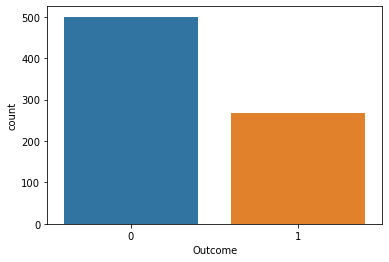

In [14]:
sns.countplot(data=df,x='Outcome')
plt.show()

From this fig, we can observe that the number of diabetic patient are almost half of the non-diabetic patient

## Categorical Variable

In [15]:
# only one categorical variable

df['_id'].value_counts()

6161af039af818f4bdffd7b5    1
6161af039af818f4bdffd9e2    1
6161af039af818f4bdffda6a    1
6161af039af818f4bdffd8ae    1
6161af039af818f4bdffd944    1
                           ..
6161af039af818f4bdffd796    1
6161af039af818f4bdffd9eb    1
6161af039af818f4bdffd887    1
6161af039af818f4bdffd7af    1
6161af039af818f4bdffd7d1    1
Name: _id, Length: 768, dtype: int64

In [16]:
df['_id'].unique().size

768

Since, all values are unique value.Hence it is of no significance. So we can drop that column

In [17]:
df.drop(columns=['_id'],inplace=True)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Numerical Variable

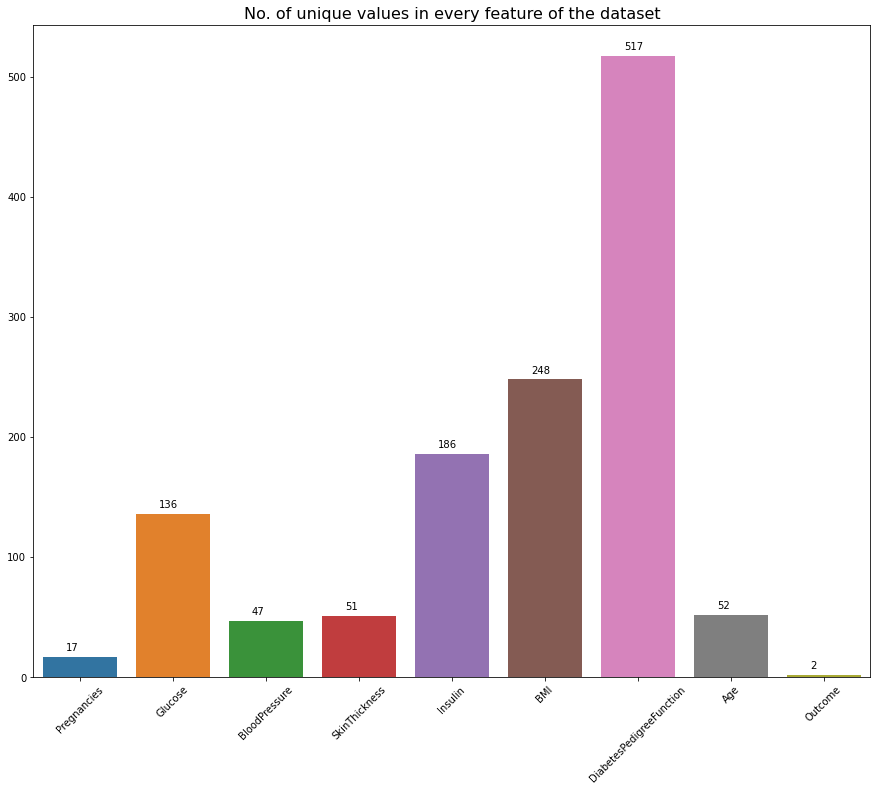

In [19]:
plt.figure(figsize=(15,12))
x = list(df.nunique().index)
y = df.nunique().values
for i in range(len(x)):
        plt.text(i-.15,y[i]+5,str(y[i]))
plt.title("No. of unique values in every feature of the dataset",fontdict={"fontsize":16})
ax=sns.barplot(x= x,y=y)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

## Exploring features seperately

### Pregnancies

In [20]:
df['Pregnancies'].isna().sum()        # check for missing values

0

In [21]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

since 0 have no meaning in Pregnancies,so have to replace it

In [22]:
df[df['Pregnancies'] == 0].count()   # count of zeros in this column

Pregnancies                 111
Glucose                     111
BloodPressure               111
SkinThickness               111
Insulin                     111
BMI                         111
DiabetesPedigreeFunction    111
Age                         111
Outcome                     111
dtype: int64

In [23]:
# replace zero by mean
df.Pregnancies.replace(0,np.mean(df.Pregnancies),inplace=True)

In [24]:
df.Pregnancies.unique()       # 0 has been replced

array([ 6.        ,  1.        ,  8.        ,  3.84505208,  5.        ,
        3.        , 10.        ,  2.        ,  4.        ,  7.        ,
        9.        , 11.        , 13.        , 15.        , 17.        ,
       12.        , 14.        ])

In [25]:
df[df['Pregnancies'] == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

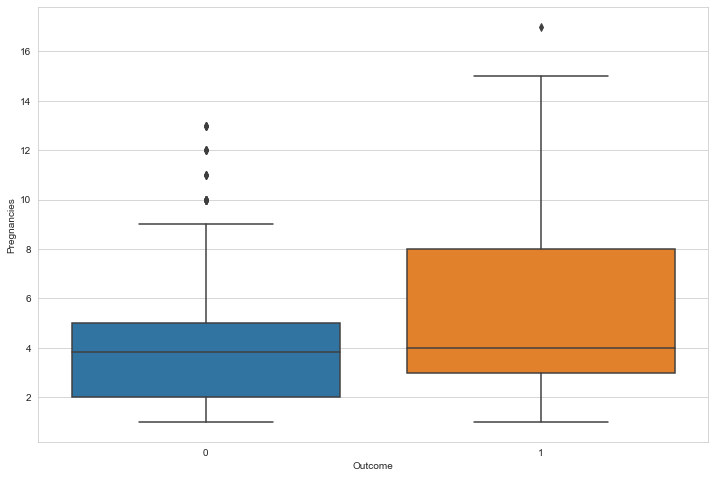

In [26]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')
sns.boxplot(y= df.Pregnancies,x=df.Outcome)

plt.show()

from this fig, we can easily observe that the median of diabetic patient  is more. Hence we can say that as the number of Pregnancies increases the chance of diabetes is also increases

<Figure size 864x576 with 0 Axes>

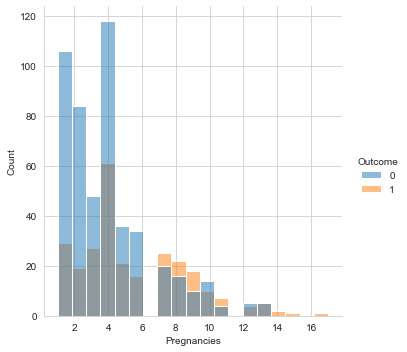

In [27]:
plt.figure(figsize=(12,8))
sns.displot(x = df.Pregnancies,hue="Outcome",data=df)
plt.show()

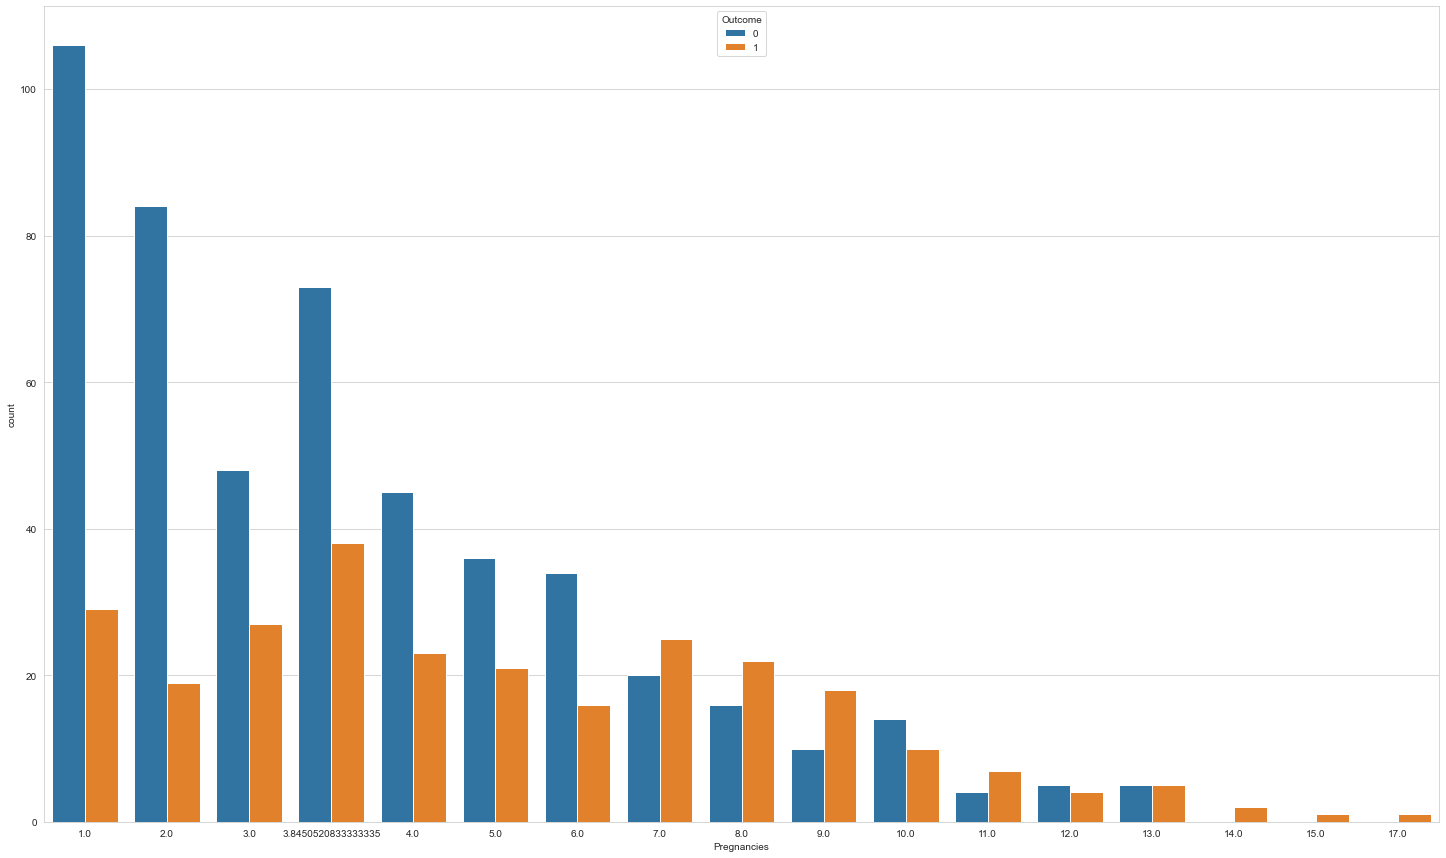

In [28]:
plt.figure(figsize=(25,15))
sns.countplot(x=df['Pregnancies'],hue=df['Outcome'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

These graphs also verifies that as the number of Pregnancies increases the chance of diabetes is also increases.

### Glucose

In [29]:
df['Glucose'].isna().sum()  

0

In [30]:
df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

Only one outlier which is zero

In [31]:
df[df['Glucose'] == 0].count()   # count of zeros in this column

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64

In [32]:
# replace zero by mean
df.Glucose.replace(0,np.mean(df.Glucose),inplace=True)

In [33]:
df.Glucose.unique()       # 0 has been replced

array([148.        ,  85.        , 183.        ,  89.        ,
       137.        , 116.        ,  78.        , 115.        ,
       197.        , 125.        , 110.        , 168.        ,
       139.        , 189.        , 166.        , 100.        ,
       118.        , 107.        , 103.        , 126.        ,
        99.        , 196.        , 119.        , 143.        ,
       147.        ,  97.        , 145.        , 117.        ,
       109.        , 158.        ,  88.        ,  92.        ,
       122.        , 138.        , 102.        ,  90.        ,
       111.        , 180.        , 133.        , 106.        ,
       171.        , 159.        , 146.        ,  71.        ,
       105.        , 101.        , 176.        , 150.        ,
        73.        , 187.        ,  84.        ,  44.        ,
       141.        , 114.        ,  95.        , 129.        ,
        79.        , 120.89453125,  62.        , 131.        ,
       112.        , 113.        ,  74.        ,  83.  

In [34]:
df[df['Glucose'] == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

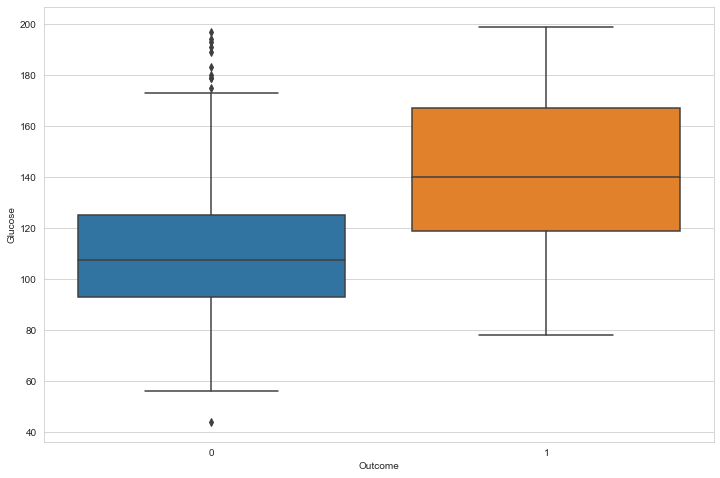

In [35]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')
sns.boxplot(y= df.Glucose,x=df.Outcome)

plt.show()

<Figure size 864x576 with 0 Axes>

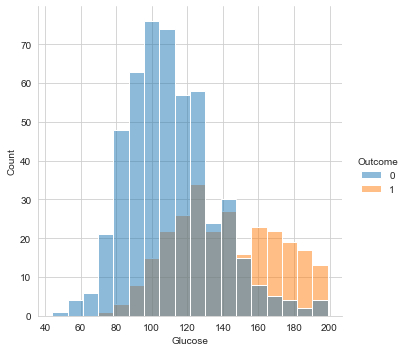

In [36]:
plt.figure(figsize=(12,8))
sns.displot(x = df.Glucose,hue="Outcome",data=df)
plt.show()

From these graphs, we can observe that if the glucose content is more then there is a high chance of diabetes

### BloodPressure

In [37]:
df['BloodPressure'].isna().sum() 

0

In [38]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [39]:
df[df['BloodPressure'] == 0].count()   # 35 zeros in this column

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

In [40]:
# replace zero by mean
df.BloodPressure.replace(0,np.mean(df.BloodPressure),inplace=True)

In [41]:
df.BloodPressure.unique()       # 0 has been replced

array([ 72.        ,  66.        ,  64.        ,  40.        ,
        74.        ,  50.        ,  69.10546875,  70.        ,
        96.        ,  92.        ,  80.        ,  60.        ,
        84.        ,  30.        ,  88.        ,  90.        ,
        94.        ,  76.        ,  82.        ,  75.        ,
        58.        ,  78.        ,  68.        , 110.        ,
        56.        ,  62.        ,  85.        ,  86.        ,
        48.        ,  44.        ,  65.        , 108.        ,
        55.        , 122.        ,  54.        ,  52.        ,
        98.        , 104.        ,  95.        ,  46.        ,
       102.        , 100.        ,  61.        ,  24.        ,
        38.        , 106.        , 114.        ])

In [42]:
df[df['BloodPressure'] == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

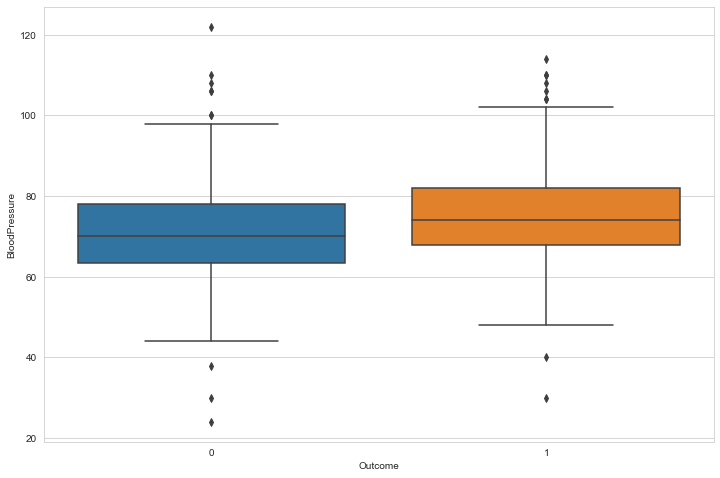

In [43]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')
sns.boxplot(y= df.BloodPressure,x=df.Outcome)

plt.show()

In [44]:
df[df['Outcome'] == 0]['BloodPressure'].value_counts().sort_index()

24.000000      1
30.000000      1
38.000000      1
44.000000      4
46.000000      2
48.000000      4
50.000000      8
52.000000      8
54.000000      9
55.000000      2
56.000000     11
58.000000     19
60.000000     30
61.000000      1
62.000000     24
64.000000     30
65.000000      6
66.000000     19
68.000000     33
69.105469     19
70.000000     34
72.000000     28
74.000000     35
75.000000      7
76.000000     21
78.000000     28
80.000000     27
82.000000     17
84.000000     11
85.000000      3
86.000000     12
88.000000     14
90.000000     11
92.000000      5
94.000000      3
95.000000      1
96.000000      3
98.000000      1
100.000000     2
106.000000     2
108.000000     1
110.000000     1
122.000000     1
Name: BloodPressure, dtype: int64

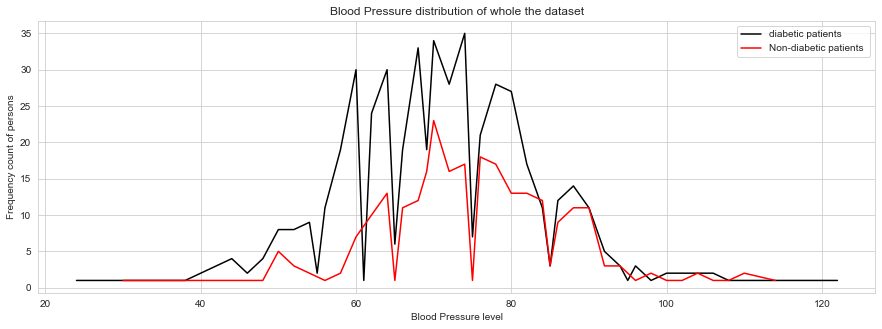

In [45]:
bp_0 = df[df['Outcome'] == 0]['BloodPressure'].value_counts().sort_index()
bp_1 = df[df['Outcome'] == 1]['BloodPressure'].value_counts().sort_index()
plt.figure(figsize = (15,5))
plt.plot(bp_0,c='k',label="diabetic patients")
plt.plot(bp_1,c='r',label='Non-diabetic patients ')
plt.xlabel("Blood Pressure level")
plt.ylabel("Frequency count of persons")
plt.title("Blood Pressure distribution of whole the dataset")
plt.legend()
plt.show()

<Figure size 864x576 with 0 Axes>

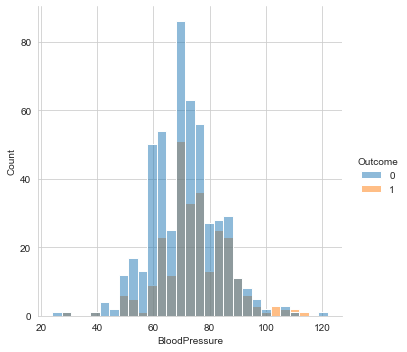

In [46]:
plt.figure(figsize=(12,8))
sns.displot(x = df.BloodPressure,hue="Outcome",data=df)
plt.show()

### SkinThickness

In [47]:
df['SkinThickness'].isna().sum() 

0

In [48]:
df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [49]:
df[df['SkinThickness'] == 0].count()   # number of zeros in this column

Pregnancies                 227
Glucose                     227
BloodPressure               227
SkinThickness               227
Insulin                     227
BMI                         227
DiabetesPedigreeFunction    227
Age                         227
Outcome                     227
dtype: int64

In [50]:
# replace zero by mean
df.SkinThickness.replace(0,np.mean(df.SkinThickness),inplace=True)

In [51]:
df.SkinThickness.unique()       # 0 has been replced

array([35.        , 29.        , 20.53645833, 23.        , 32.        ,
       45.        , 19.        , 47.        , 38.        , 30.        ,
       41.        , 33.        , 26.        , 15.        , 36.        ,
       11.        , 31.        , 37.        , 42.        , 25.        ,
       18.        , 24.        , 39.        , 27.        , 21.        ,
       34.        , 10.        , 60.        , 13.        , 20.        ,
       22.        , 28.        , 54.        , 40.        , 51.        ,
       56.        , 14.        , 17.        , 50.        , 44.        ,
       12.        , 46.        , 16.        ,  7.        , 52.        ,
       43.        , 48.        ,  8.        , 49.        , 63.        ,
       99.        ])

In [52]:
df[df['SkinThickness'] == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

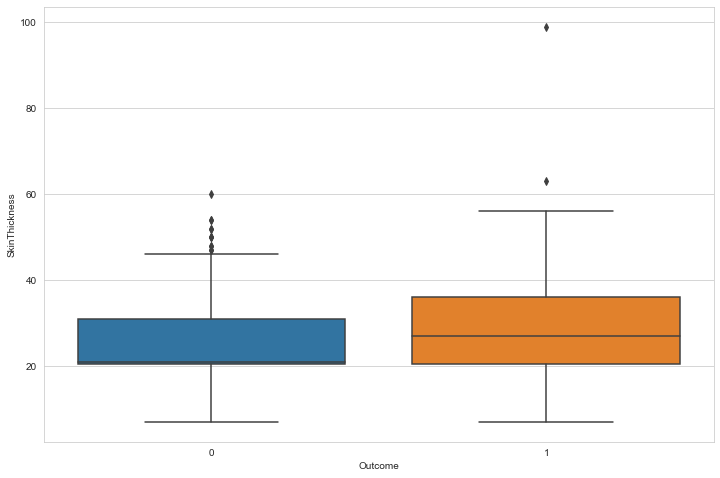

In [53]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')
sns.boxplot(y= df.SkinThickness,x=df.Outcome)
plt.show()

In [54]:
# Handle the outlier and replace it by mean()
df[df.SkinThickness.values>80]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2.0,197.0,70.0,99.0,0,34.7,0.575,62,1


In [55]:
df['SkinThickness'].replace(99.0,df.SkinThickness.mean(),inplace=True)

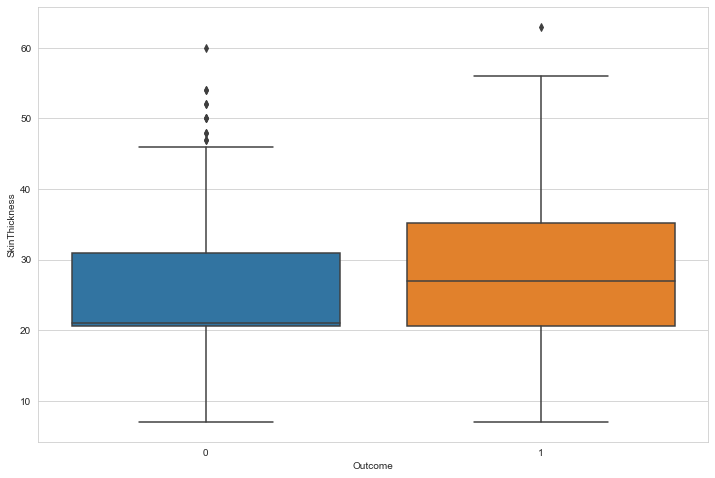

In [56]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')
sns.boxplot(y= df.SkinThickness,x=df.Outcome)
plt.show()

### Insulin

In [57]:
df['Insulin'].isna().sum() 

0

In [58]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [59]:
df[df['Insulin'] == 0].count()   # 35 zeros in this column

Pregnancies                 374
Glucose                     374
BloodPressure               374
SkinThickness               374
Insulin                     374
BMI                         374
DiabetesPedigreeFunction    374
Age                         374
Outcome                     374
dtype: int64

In [60]:
# replace zero by median
df.Insulin.replace(0,np.median(df.Insulin),inplace=True)

In [61]:
df.Insulin.unique()       # 0 has been replced

array([ 30.5,  94. , 168. ,  88. , 543. , 846. , 175. , 230. ,  83. ,
        96. , 235. , 146. , 115. , 140. , 110. , 245. ,  54. , 192. ,
       207. ,  70. , 240. ,  82. ,  36. ,  23. , 300. , 342. , 304. ,
       142. , 128. ,  38. , 100. ,  90. , 270. ,  71. , 125. , 176. ,
        48. ,  64. , 228. ,  76. , 220. ,  40. , 152. ,  18. , 135. ,
       495. ,  37. ,  51. ,  99. , 145. , 225. ,  49. ,  50. ,  92. ,
       325. ,  63. , 284. , 119. , 204. , 155. , 485. ,  53. , 114. ,
       105. , 285. , 156. ,  78. , 130. ,  55. ,  58. , 160. , 210. ,
       318. ,  44. , 190. , 280. ,  87. , 271. , 129. , 120. , 478. ,
        56. ,  32. , 744. , 370. ,  45. , 194. , 680. , 402. , 258. ,
       375. , 150. ,  67. ,  57. , 116. , 278. , 122. , 545. ,  75. ,
        74. , 182. , 360. , 215. , 184. ,  42. , 132. , 148. , 180. ,
       205. ,  85. , 231. ,  29. ,  68. ,  52. , 255. , 171. ,  73. ,
       108. ,  43. , 167. , 249. , 293. ,  66. , 465. ,  89. , 158. ,
        84. ,  72. ,

In [62]:
df[df['Insulin'] == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

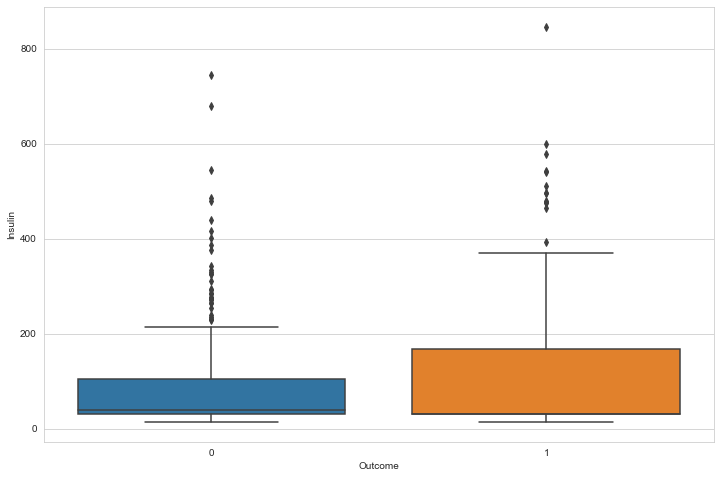

In [63]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')
sns.boxplot(y= df.Insulin,x=df.Outcome)

plt.show()

### BMI

In [64]:
df['BMI'].isna().sum() 

0

In [65]:
df['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

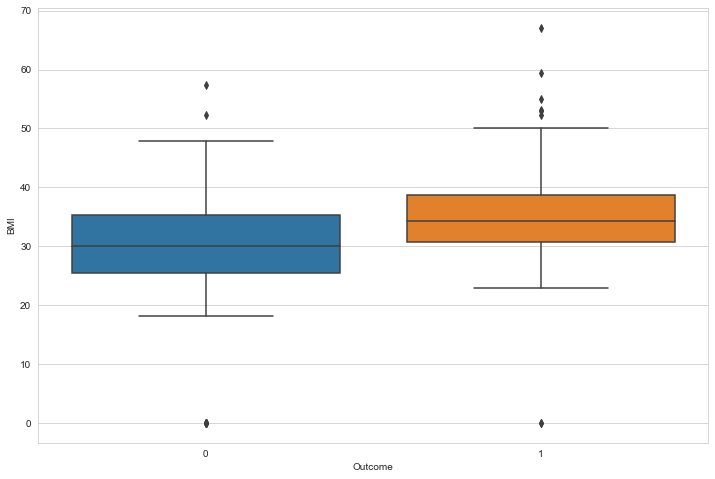

In [66]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')
sns.boxplot(y= df.BMI,x=df.Outcome)

plt.show()

In [67]:
df[df['BMI'] == 0].count()   #  zeros in this column

Pregnancies                 11
Glucose                     11
BloodPressure               11
SkinThickness               11
Insulin                     11
BMI                         11
DiabetesPedigreeFunction    11
Age                         11
Outcome                     11
dtype: int64

In [68]:
# replace zero by mean
df.BMI.replace(0,np.mean(df.BMI),inplace=True)

In [69]:
df.BMI.unique()       # 0 has been replced

array([33.6       , 26.6       , 23.3       , 28.1       , 43.1       ,
       25.6       , 31.        , 35.3       , 30.5       , 31.99257812,
       37.6       , 38.        , 27.1       , 30.1       , 25.8       ,
       30.        , 45.8       , 29.6       , 43.3       , 34.6       ,
       39.3       , 35.4       , 39.8       , 29.        , 36.6       ,
       31.1       , 39.4       , 23.2       , 22.2       , 34.1       ,
       36.        , 31.6       , 24.8       , 19.9       , 27.6       ,
       24.        , 33.2       , 32.9       , 38.2       , 37.1       ,
       34.        , 40.2       , 22.7       , 45.4       , 27.4       ,
       42.        , 29.7       , 28.        , 39.1       , 19.4       ,
       24.2       , 24.4       , 33.7       , 34.7       , 23.        ,
       37.7       , 46.8       , 40.5       , 41.5       , 25.        ,
       25.4       , 32.8       , 32.5       , 42.7       , 19.6       ,
       28.9       , 28.6       , 43.4       , 35.1       , 32.  

In [70]:
df[df['BMI'] == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### DiabetesPedigreeFunction

In [71]:
df['DiabetesPedigreeFunction'].isna().sum() 

0

In [72]:
df['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [74]:
df[df['DiabetesPedigreeFunction'] == 0].count()   #  zeros in this column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [75]:
# replace zero by median
df.DiabetesPedigreeFunction.replace(0,np.median(df.DiabetesPedigreeFunction),inplace=True)

In [76]:
df.DiabetesPedigreeFunction.unique()       # 0 has been replced

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [77]:
df[df['DiabetesPedigreeFunction'] == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

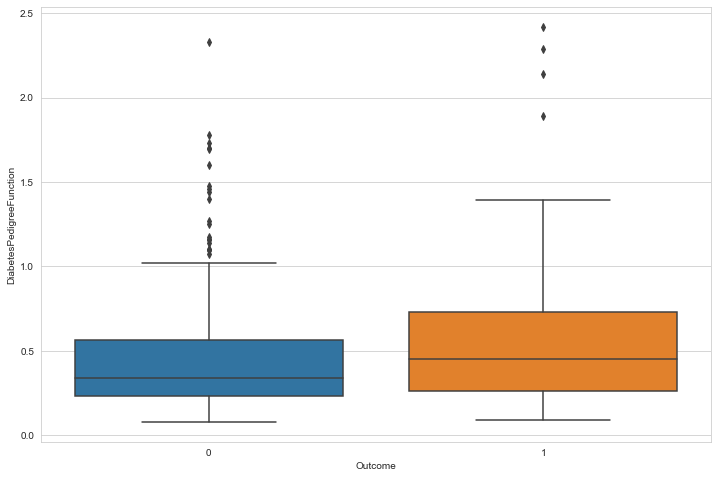

In [73]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')
sns.boxplot(y= df.DiabetesPedigreeFunction,x=df.Outcome)

plt.show()

<Figure size 864x576 with 0 Axes>

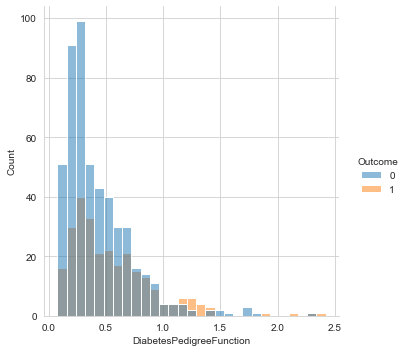

In [105]:
plt.figure(figsize=(12,8))
sns.displot(x = df.DiabetesPedigreeFunction,hue="Outcome",data=df)
plt.show()

### Age

In [78]:
df['Age'].isna().sum() 

0

In [79]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [80]:
df[df['Age'] == 0].count()   #  zeros in this column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [81]:
# replace zero by mean
df.Age.replace(0,np.mean(df.Age),inplace=True)

In [82]:
df.Age.unique()       # 0 has been replced

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [83]:
df[df['Age'] == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

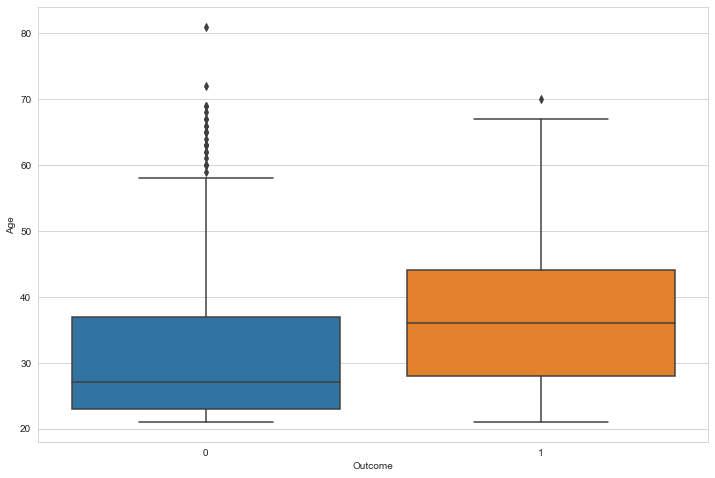

In [84]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')
sns.boxplot(y= df.Age,x=df.Outcome)

plt.show()

<Figure size 864x576 with 0 Axes>

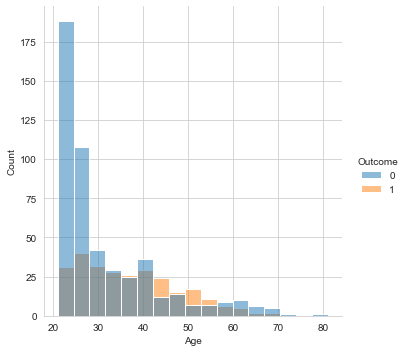

In [106]:
plt.figure(figsize=(12,8))
sns.displot(x = df.Age,hue="Outcome",data=df)
plt.show()

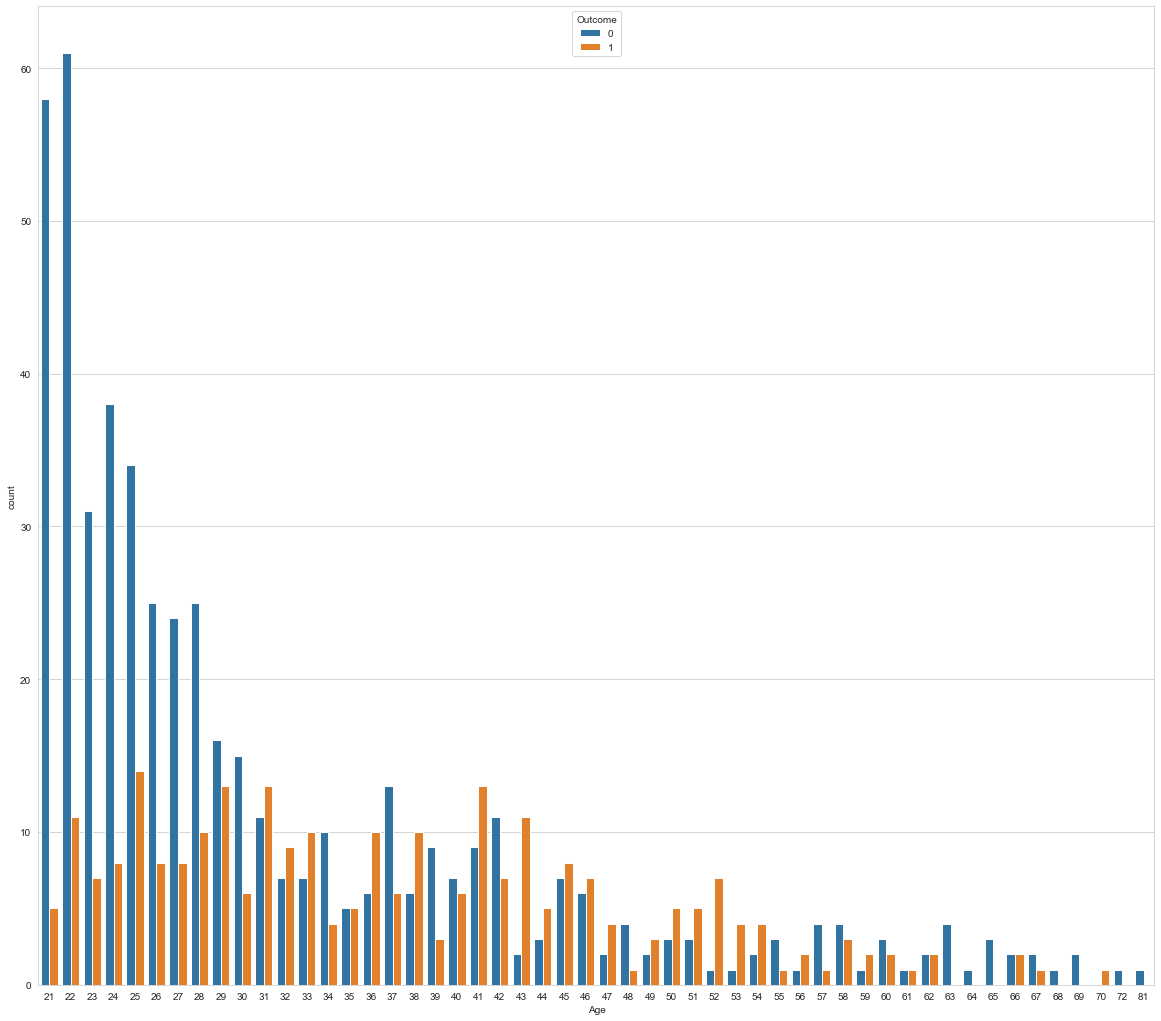

In [85]:
plt.figure(figsize=(20,18))
sns.countplot(x=df['Age'],hue=df['Outcome'])
plt.show()

 we get to know from this countplot that chances of having diabetes increases with age. Till age 30, the number of diabetes patients are less in caparison to non-diabetic patient but after 30 number of diabetic patient increases

## Draw correlation between features

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are, i.e. as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1 because those squares are correlating each variable to itself (so it's a perfect correlation).

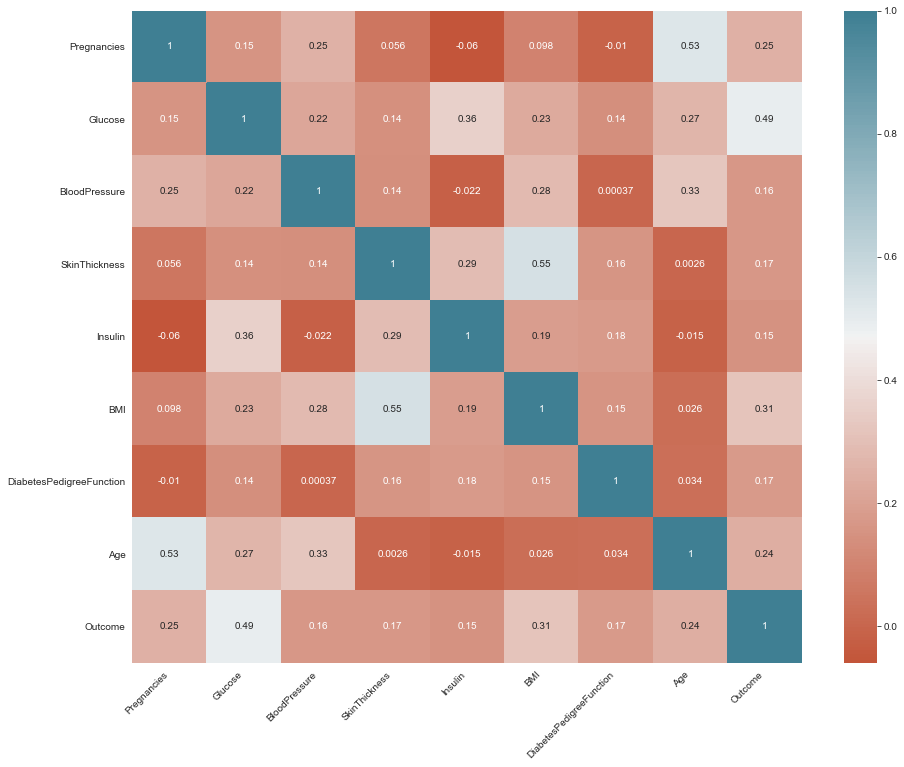

In [87]:
plt.figure(figsize = (15,12))
sns.set_context( font_scale=2)

ax= sns.heatmap(df.corr(), annot =True,cmap=sns.diverging_palette(20, 220, n=200),)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

plt.show()

From the graph, we can observe that some features are highly correlated to others while some are very less correlate.
Our aim is to find those feature which are highly correlated and also how are these correlated.
   
   1. BMI & SkinThickness   - 0.55
   2. Age & Pregnancies     - 0.53
   3. Glucose & Outcome     - 0.49
   4. Insulin & Glucose     - 0.36
   5. Age & Bloodressure   - 0.33
   6. BMI & Outcome         - 0.31
   7. Insulin & SkinThickness- 0.29
   

## BMI & SkinThickness

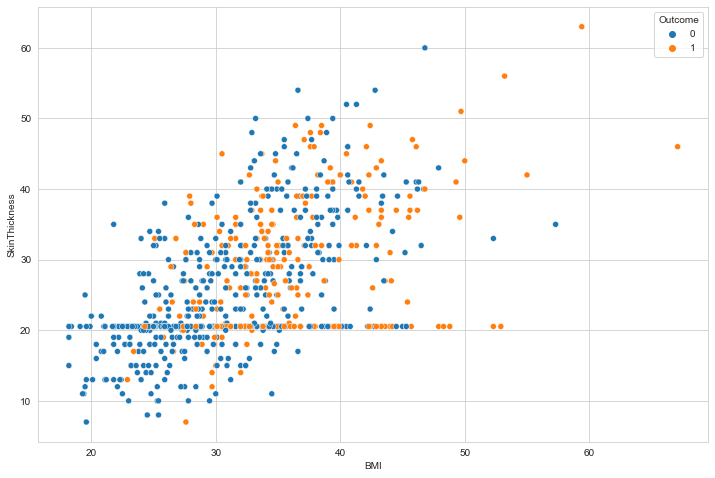

In [148]:
plt.figure(figsize = (12,8))
sns.set_context( font_scale=2)
sns.scatterplot(x=df['BMI'], y=df['SkinThickness'],hue=df['Outcome'],color="#4CB391")
plt.show()

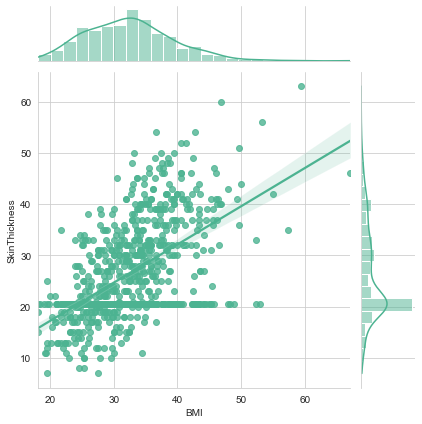

In [160]:

sns.jointplot(x=df['BMI'], y=df['SkinThickness'],kind='reg',color="#4CB391")
plt.show()

Observations:
1. There is a linear relation between BMI and SkinThickness 
2. maximum  patient having BMI lies between 30-35
3. maximum patient having Skinthickness  lies near 20

## Age & Pregnancies

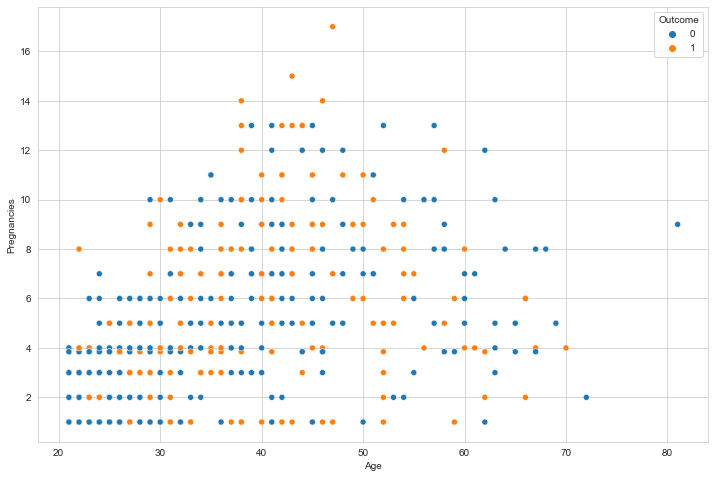

In [150]:
plt.figure(figsize = (12,8))
sns.set_context( font_scale=2)
sns.scatterplot(x=df['Age'], y=df['Pregnancies'],hue=df['Outcome'],color="#4CB391")
plt.show()

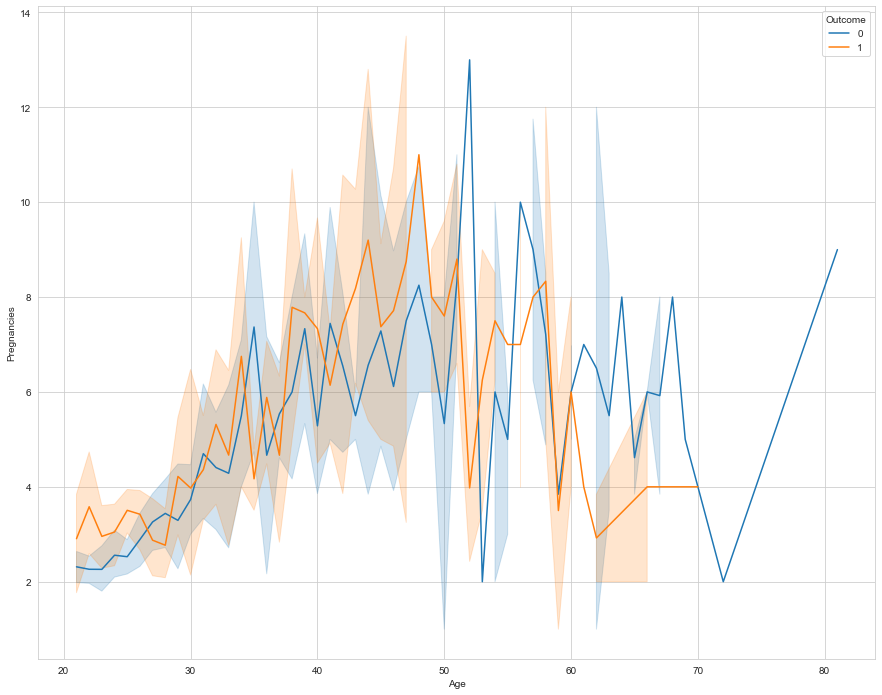

In [166]:
plt.figure(figsize = (15,12))
sns.set_context( font_scale=2)
sns.lineplot(x='Age',y='Pregnancies',hue='Outcome',data=df)
plt.show()

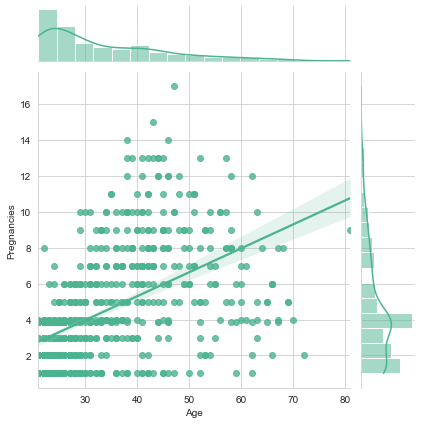

In [159]:
sns.jointplot(x=df['Age'], y=df['Pregnancies'],kind='reg',color="#4CB391")
plt.show()

Observations:
1. There is a linear relation between Age and Pregnancies 
2. Maximum Pregnancies occurs in patients is 2-4 at an age less than 30

## Insulin & Glucose

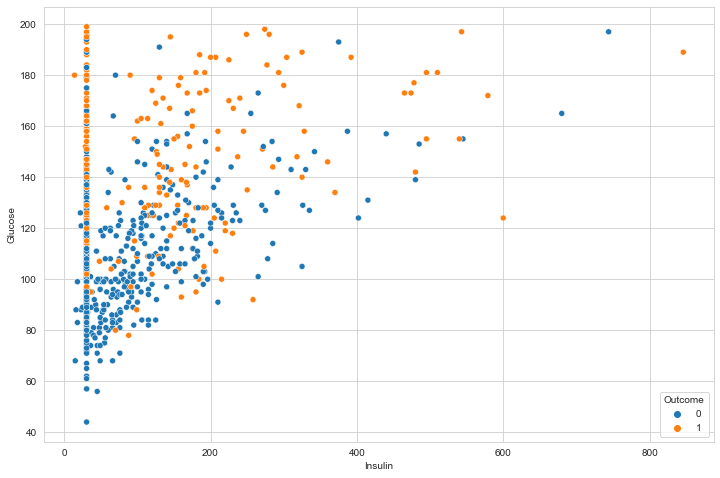

In [152]:
plt.figure(figsize = (12,8))
sns.set_context( font_scale=2)
sns.scatterplot(x=df['Insulin'], y=df['Glucose'],hue=df['Outcome'],color="#4CB391")
plt.show()

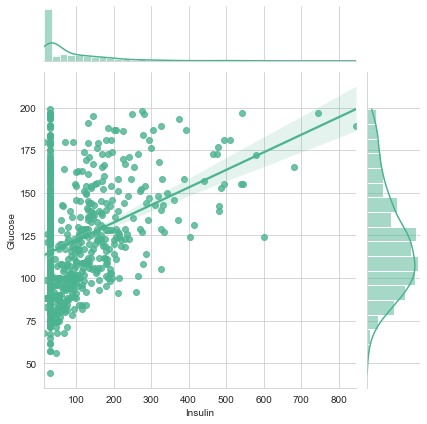

In [161]:
sns.jointplot(x=df['Insulin'], y=df['Glucose'],kind='reg',color="#4CB391")
plt.show()

Observations:
1. There is a linear relation between Insulin and Glucose 
2. maximum patient have glucose level lies between 100-125

## Age & BloodPressure

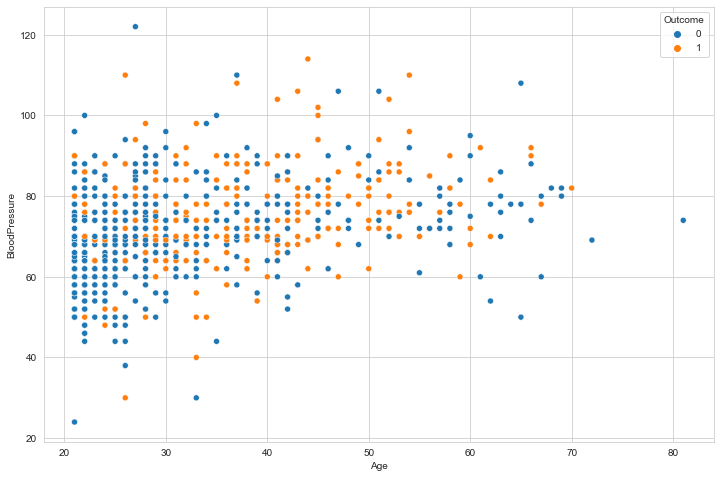

In [154]:
plt.figure(figsize = (12,8))
sns.set_context( font_scale=2)
sns.scatterplot(x=df['Age'], y=df['BloodPressure'],hue=df['Outcome'],color="#4CB391")
plt.show()

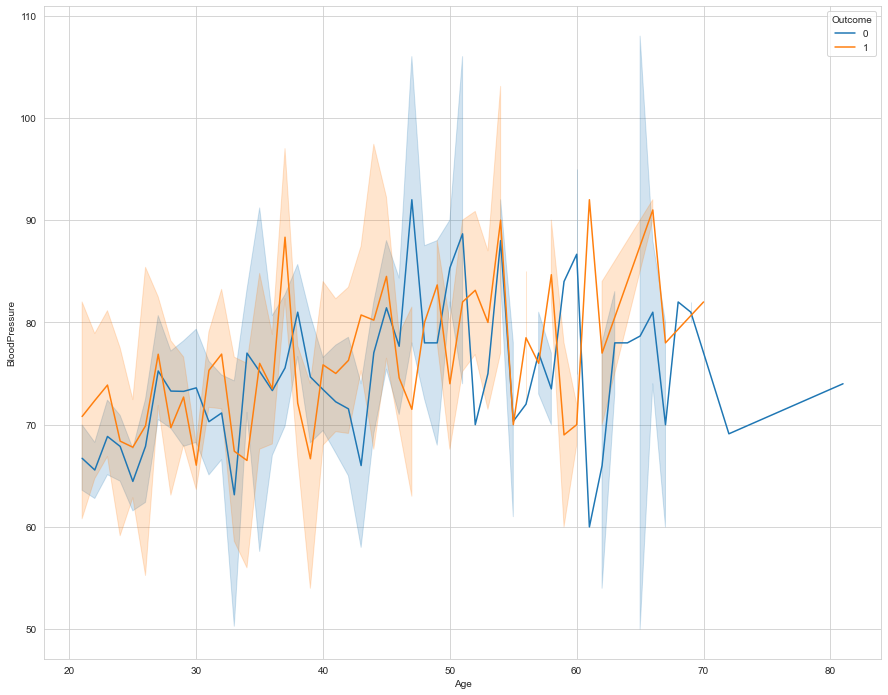

In [164]:
plt.figure(figsize = (15,12))
sns.set_context( font_scale=2)
sns.lineplot(x='Age',y='BloodPressure',hue='Outcome',data=df)
plt.show()

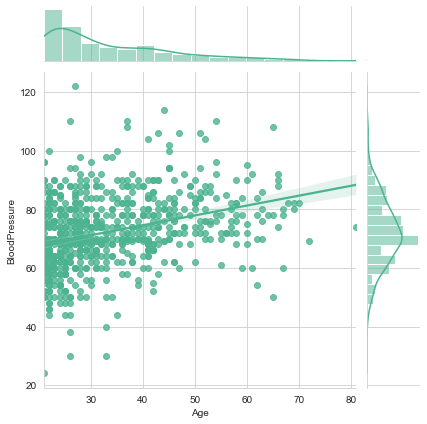

In [162]:
sns.jointplot(x=df['Age'], y=df['BloodPressure'],kind='reg',color="#4CB391")
plt.show()

Observations:
1. There is a linear relation between Age and BloodPressure, which means as Age increases ,BloodPressure also increases but here slope is less inclined in comparison to other relation we have observed 
2. maximum patientS having BloodPressure 60-80 range